In [21]:
import numpy as np
import os
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

import sklearn  
from sklearn.datasets import make_regression
from sklearn import linear_model, datasets
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from tqdm import tqdm

%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})

In [34]:
parentDirectory = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

df = pd.read_csv(os.path.join(parentDirectory, 'augmented_data.csv'))

In [35]:
#Separate X and y data
X = df.drop(columns =['Unnamed: 0','Unnamed: 0.1','Diameter_nm','Absorbance max (nm)', 'PL max (nm)'], 
                  inplace = False, axis = 1) #keep synthesis parameters that matter
y_size = df['Diameter_nm'].values #will predict diameter
y_abs = df['Absorbance max (nm)'].values #will predict absorbance
y_PL = df['PL max (nm)'].values #will predict PL

# Size prediction (kernel='linear')

In [39]:
#split dataset into train and test set
X_train, X_test, y_size_train, y_size_test = train_test_split(X, y_size, test_size=0.25, random_state=8, shuffle=True)

In [40]:
svr = SVR(kernel='linear')
svr.fit(X_train,y_size_train)
y_size_predict = svr.predict(X_test)
MSE = mean_squared_error(y_size_test, y_size_predict)
RMSE = mean_squared_error(y_size_test, y_size_predict, squared=False)
R2 = r2_score(y_size_test, y_size_predict)
MAE = mean_absolute_error(y_size_test, y_size_predict)

print("MSE", MSE, "RMSE", RMSE, "R2", R2, "MAE", MAE)

MSE 1.3470466909895378 RMSE 1.1606234061871825 R2 0.2559359223408595 MAE 0.7008735400034349


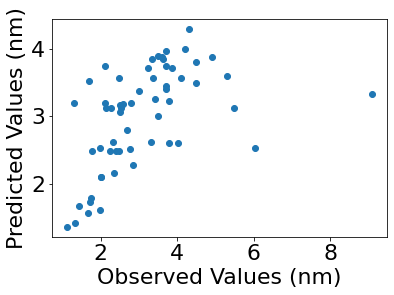

In [41]:
plt.figure()
plt.title("")
plt.plot(y_size_test, y_size_predict, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.show()

# Size prediction (kernel='rbf')

In [42]:
rbf = SVR(kernel='rbf')
rbf.fit(X_train,y_size_train)
y_size_predict = rbf.predict(X_test)
MSE = mean_squared_error(y_size_test, y_size_predict)
R2 = r2_score(y_size_test, y_size_predict)

print("MSE", MSE, "R2", R2)

MSE 1.2674515046247017 R2 0.29990167298989856


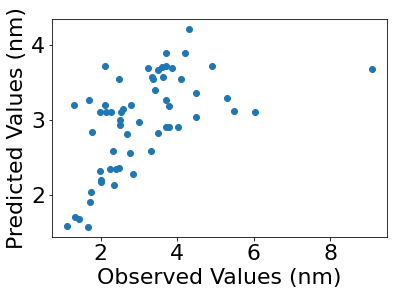

In [43]:
plt.figure()
plt.title("")
plt.plot(y_size_test, y_size_predict, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.show()

# Abs prediction (kernel='linear')

In [44]:
#split dataset into train and test set
X_train, X_test, y_abs_train, y_abs_test = train_test_split(X, y_abs, test_size=0.25, random_state=8, shuffle=True)

In [46]:
svr = SVR(kernel='linear')
svr.fit(X_train,y_abs_train)
y_abs_predict = svr.predict(X_test)
MSE = mean_squared_error(y_abs_test, y_abs_predict)
RMSE = mean_squared_error(y_abs_test, y_abs_predict, squared=False)
R2 = r2_score(y_abs_test, y_abs_predict)
MAE = mean_absolute_error(y_abs_test, y_abs_predict)

print("MSE", MSE, "R2", R2, "RMSE", RMSE, "MAE", MAE)

MSE 2918.78117931605 R2 0.4295622701825158 RMSE 54.025745523000886 MAE 38.38710633891886


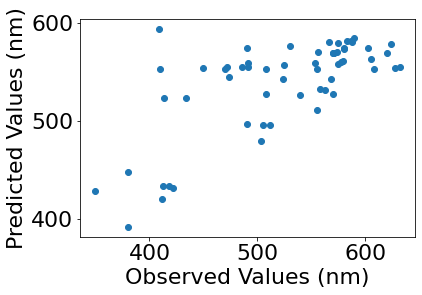

In [38]:
plt.figure()
plt.title("")
plt.plot(y_abs_test, y_abs_predict, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.show()

# Abs prediction (kernel='rbf')

In [48]:
rbf = SVR(kernel='rbf')
rbf.fit(X_train,y_abs_train)
y_abs_predict = rbf.predict(X_test)
MSE = mean_squared_error(y_abs_test, y_abs_predict)
RMSE = mean_squared_error(y_abs_test, y_abs_predict, squared=False)
R2 = r2_score(y_abs_test, y_abs_predict)
MAE = mean_absolute_error(y_abs_test, y_abs_predict)

print("MSE", MSE, "R2", R2, "RMSE", RMSE, "MAE", MAE)

MSE 5311.576254813718 R2 -0.038078332839732054 RMSE 72.8805615703784 MAE 57.13587904193199


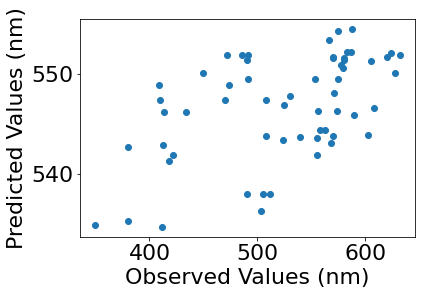

In [40]:
plt.figure()
plt.title("")
plt.plot(y_abs_test, y_abs_predict, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.show()

# PL prediction (kernel='linear')

In [50]:
#split dataset into train and test set
X_train, X_test, y_PL_train, y_PL_test = train_test_split(X, y_PL, test_size=0.25, random_state=8, shuffle=True)

In [51]:
svr = SVR(kernel='linear')
svr.fit(X_train,y_PL_train)
y_PL_predict = svr.predict(X_test)
MSE = mean_squared_error(y_PL_test, y_PL_predict)
RMSE = mean_squared_error(y_PL_test, y_PL_predict, squared=False)
R2 = r2_score(y_PL_test, y_PL_predict)
MAE = mean_absolute_error(y_PL_test, y_PL_predict)
print("MSE", MSE, "R2", R2, "RMSE", RMSE, "MAE", MAE)

MSE 1576.6251639257027 R2 0.09903773015710615 RMSE 39.706739527764086 MAE 29.682700964792826


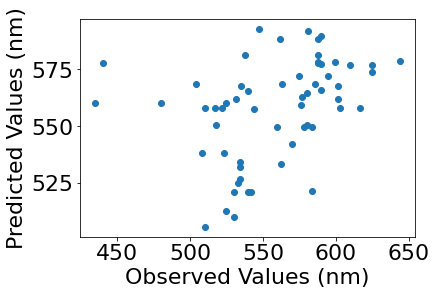

In [42]:
plt.figure()
plt.title("")
plt.plot(y_PL_test, y_PL_predict, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.show()

# PL prediction (kernel='rbf')

In [52]:
rbf = SVR(kernel='rbf')
rbf.fit(X_train,y_PL_train)
y_PL_predict = rbf.predict(X_test)
MSE = mean_squared_error(y_PL_test, y_PL_predict)
RMSE = mean_squared_error(y_PL_test, y_PL_predict, squared=False)
R2 = r2_score(y_PL_test, y_PL_predict)
MAE = mean_absolute_error(y_PL_test, y_PL_predict)
print("MSE", MSE, "R2", R2, "RMSE", RMSE, "MAE", MAE)

MSE 1638.8864240373987 R2 0.0634585401777713 RMSE 40.483162228726634 MAE 32.75266857929111


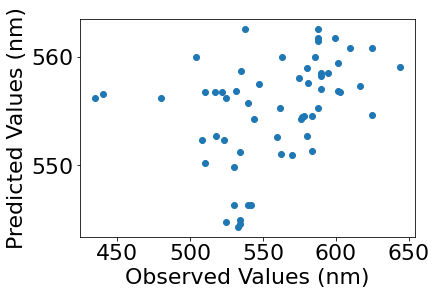

In [44]:
plt.figure()
plt.title("")
plt.plot(y_PL_test, y_PL_predict, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.show()